In [1]:
from dysregnet import dysregnet

In [2]:
from tqdm import tqdm
import pandas as pd
from scipy.stats import zscore
from sklearn.linear_model import LinearRegression, HuberRegressor
from tqdm import tqdm
import numpy as np
from scipy import stats
import statsmodels.stats.multitest as mt
import statsmodels.api as sm

In [3]:
import pandas as pd

meta = pd.read_csv("../../PANCAN/clinical.csv")
case = pd.read_csv("../../PANCAN/BRCA/expr_case.csv" )
control = pd.read_csv("../../PANCAN/BRCA/expr_control.csv")
grn=pd.read_csv("../../olga_scripts/HTRIdb_data.csv", sep = ";")


In [4]:
grn = grn[["SYMBOL_TF","SYMBOL_TG"]]

In [5]:
expr=pd.concat([control,case])

In [6]:
i=list(expr.iloc[:,0])
meta=meta[ meta.iloc[:,0].isin(i)]

In [7]:
meta.sample_type.unique()

array(['Primary Tumor', 'Solid Tissue Normal', 'Metastatic'], dtype=object)

In [8]:
meta.sample_type=meta.sample_type.apply(lambda x: 0 if x=='Solid Tissue Normal' else 1)

In [9]:
meta.sample_type.unique()

array([1, 0])

In [10]:
CatCov=['race','gender']  
ConCov=['birth_days_to',]

In [11]:
meta["birth_days_to"] = meta["birth_days_to"].fillna(meta["birth_days_to"].mean())


In [12]:
meta.head(4)

,sample,_PATIENT,cancer type abbreviation,age_at_initial_pathologic_diagnosis,gender,race,ajcc_pathologic_tumor_stage,clinical_stage,histological_type,histological_grade,...,DSS,DSS.time,DFI,DFI.time,PFI,PFI.time,Redaction,sample_type_id,sample_type,_primary_disease
0,TCGA-3C-AAAU-01,TCGA-3C-AAAU,BRCA,55.0,FEMALE,WHITE,Stage X,NaN,Infiltrating Lobular Carcinoma,NaN,...,0.0,4047.0,1.0,1808.0,1.0,1808.0,NaN,1.0,1,breast invasive carcinoma
1,TCGA-3C-AALI-01,TCGA-3C-AALI,BRCA,50.0,FEMALE,BLACK OR AFRICAN AMERICAN,Stage IIB,NaN,Infiltrating Ductal Carcinoma,NaN,...,0.0,4005.0,0.0,4005.0,0.0,4005.0,NaN,1.0,1,breast invasive carcinoma
2,TCGA-3C-AALJ-01,TCGA-3C-AALJ,BRCA,62.0,FEMALE,BLACK OR AFRICAN AMERICAN,Stage IIB,NaN,Infiltrating Ductal Carcinoma,NaN,...,0.0,1474.0,0.0,1474.0,0.0,1474.0,NaN,1.0,1,breast invasive carcinoma
3,TCGA-3C-AALK-01,TCGA-3C-AALK,BRCA,52.0,FEMALE,BLACK OR AFRICAN AMERICAN,Stage IA,NaN,Infiltrating Ductal Carcinoma,NaN,...,0.0,1448.0,NaN,NaN,0.0,1448.0,NaN,1.0,1,breast invasive carcinoma


In [13]:
expr.head(4)

,Unnamed: 0,SNAP29,CENPP,DHX8,EFNA5,SORCS1,CTSL,CALB1,PCDHA2,PSMC3IP,...,ATF7-NPFF,ARHGEF35,LGALS7B,NECAB3,ENDOG,CCDC74A,PODNL1,SDCBP,GEN1,MORN1
0,TCGA-BH-A0DL-11,0.011039,-0.433531,0.148784,0.881892,0.397204,0.291111,0.202938,0.830075,-0.660478,...,2.107643,-0.210640,1.364119,-1.194724,-0.340685,-0.441246,0.029741,0.821344,0.556907,0.357661
1,TCGA-BH-A0BQ-11,-0.396226,-1.101919,0.125927,1.076358,1.130668,-0.994074,1.458626,0.596539,-1.280311,...,0.954723,0.630559,1.248929,-1.249310,-0.220519,-0.123971,1.129753,0.316649,0.489605,0.182808
2,TCGA-BH-A18J-11,-0.289872,-0.875374,0.084214,0.595231,-0.138605,0.214701,1.554930,-0.567784,-0.867467,...,1.975898,0.727769,1.129948,-0.634645,-0.892021,-0.807988,0.204867,0.702972,-0.128616,0.410850
3,TCGA-BH-A18R-11,-0.367729,-0.845867,-0.890999,0.537888,0.340662,-0.389748,0.073558,0.264370,-0.664225,...,0.922040,0.333581,0.341515,-0.985415,-0.816454,-0.518450,-0.521705,0.189719,-1.269150,0.043587


In [14]:
grn.head(4)

,SYMBOL_TF,SYMBOL_TG
0,PARP1,BRCA2
1,PARP1,BRCA2
2,AHR,CYP1A1
3,AHR,CYP1A1


In [15]:
data=dysregnet.run(expression_data=expr,
                   meta=meta, 
                   CatCov=CatCov,
                   ConCov=ConCov,
                   GRN=grn,
                   normaltest=True,
                   R2_threshold=.2,
                   conCol='sample_type')

14162it [00:38, 367.67it/s]


In [16]:
data.get_results()

,patient id,"(PARP1, BRCA2)","(AHR, CYP1B1)","(AHR, FOS)","(AHR, SOS1)","(AHR, UGT1A6)","(AR, ABCA1)","(AR, ABCA2)","(AR, ABCF1)","(AR, ABCA4)",...,"(ZNF419, CDKN2A)","(ZNF671, CDKN2A)","(THAP7, CDKN2A)","(FOXP2, PLAUR)","(FOXP2, CNTNAP2)","(ZNF653, CDKN2A)","(E2F7, SP1)","(ZNF417, CDKN2A)","(ZNF384, CDKN2A)","(ZNF384, COL1A1)"
0,TCGA-3C-AAAU-01,0.000000,0.0,0,0.0,0,0,0,0,0.0,...,0,0,0.0,0,0,0.0,0.0,0,0,0
1,TCGA-3C-AALI-01,0.000000,0.0,0,0.0,0,0,0,0,0.0,...,0,0,0.0,0,0,0.0,0.0,0,0,0
2,TCGA-3C-AALJ-01,0.000000,0.0,0,0.0,0,0,0,0,0.0,...,0,0,0.0,0,0,0.0,0.0,0,0,0
3,TCGA-3C-AALK-01,0.000000,0.0,0,0.0,0,0,0,0,0.0,...,0,0,0.0,0,0,0.0,0.0,0,0,0
4,TCGA-4H-AAAK-01,0.000000,0.0,0,0.0,0,0,0,0,0.0,...,0,0,0.0,0,0,0.0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1093,TCGA-WT-AB44-01,6.279718,0.0,0,0.0,0,0,0,0,0.0,...,0,0,0.0,0,0,0.0,0.0,0,0,0
1094,TCGA-XX-A899-01,0.000000,0.0,0,0.0,0,0,0,0,0.0,...,0,0,0.0,0,0,0.0,0.0,0,0,0
1095,TCGA-XX-A89A-01,0.000000,0.0,0,0.0,0,0,0,0,0.0,...,0,0,0.0,0,0,0.0,0.0,0,0,0
1096,TCGA-Z7-A8R5-01,0.000000,0.0,0,0.0,0,0,0,0,0.0,...,0,0,0.0,0,0,0.0,0.0,0,0,0


In [397]:
data.cov_df

,birth_days_to,race_ASIAN,race_BLACK OR AFRICAN AMERICAN,race_WHITE,race_[Not Evaluated],gender_MALE
sample,,,,,,
TCGA-3C-AAAU-01,-20211.000000,0,0,1,0,0
TCGA-3C-AALI-01,-18538.000000,0,1,0,0,0
TCGA-3C-AALJ-01,-22848.000000,0,1,0,0,0
TCGA-3C-AALK-01,-19074.000000,0,1,0,0,0
TCGA-4H-AAAK-01,-18371.000000,0,0,1,0,0
...,...,...,...,...,...,...
TCGA-WT-AB44-01,-21510.622594,0,0,1,0,0
TCGA-XX-A899-01,-17022.000000,0,0,1,0,0
TCGA-XX-A89A-01,-25000.000000,0,0,1,0,0


In [18]:
grn=data.GRN
grn

,SYMBOL_TF,SYMBOL_TG
0,PARP1,BRCA2
7,AHR,CYP1B1
9,AHR,FOS
10,AHR,SOS1
11,AHR,UGT1A6
...,...,...
18623,ZNF653,CDKN2A
18625,E2F7,SP1
18626,ZNF417,CDKN2A
18628,ZNF384,CDKN2A


In [19]:
control=pd.merge(data.cov_df.loc[data.control],data.expr, left_index=True, right_index=True).drop_duplicates()
case=pd.merge(data.cov_df.loc[data.case],data.expr, left_index=True, right_index=True).drop_duplicates()

In [20]:
def corr_filter(x,y):
    x=control[x].values
    y=control[y].values
    corr,_=stats.pearsonr(x, y)
    return float(corr)

In [21]:
grn['corr'] = grn.apply(lambda x: corr_filter(x.SYMBOL_TF, x.SYMBOL_TG), axis=1)


In [22]:
grn['corr']

0        0.692818
7        0.660386
9       -0.017677
10       0.657840
11       0.112107
           ...   
18623    0.308648
18625    0.396043
18626    0.163404
18628    0.048248
18629    0.031284
Name: corr, Length: 14162, dtype: float64

In [23]:
grn=grn[abs(grn['corr'])>=0.3]
grn

,SYMBOL_TF,SYMBOL_TG,corr
0,PARP1,BRCA2,0.692818
7,AHR,CYP1B1,0.660386
10,AHR,SOS1,0.657840
15,AR,ABCF1,0.320614
16,AR,ABCA4,0.322658
...,...,...,...
18605,BCL11A,CDKN2A,0.399156
18613,ZSCAN18,CDKN2A,0.452570
18619,THAP7,CDKN2A,0.303374
18623,ZNF653,CDKN2A,0.308648


In [24]:
ids=data.results['patient id']

In [25]:
def get_all_tfs(x):
    y=grn['SYMBOL_TF'][grn.SYMBOL_TG==x].unique()
    return y

In [26]:
grn['tf_complex']=grn['SYMBOL_TG'].apply( lambda x: get_all_tfs(x))

/tmp/ipykernel_73041/1291458463.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grn['tf_complex']=grn['SYMBOL_TG'].apply( lambda x: get_all_tfs(x))


In [27]:
complexes=grn[['tf_complex','SYMBOL_TG']].drop_duplicates(subset=['SYMBOL_TG'])

In [28]:
complexes

,tf_complex,SYMBOL_TG
0,"[PARP1, E2F4, MYC, NFKB1, RELA]",BRCA2
7,"[AHR, ARNT, BRCA1, SP1]",CYP1B1
10,"[AHR, AR, HIF1A]",SOS1
15,"[AR, FOXP3]",ABCF1
16,[AR],ABCA4
...,...,...
18538,[FOXP3],RCN1P2
18541,[FOXP3],PDZK1P1
18554,[FOXP3],CCR2
18572,[FOXP3],FLJ37453


In [29]:
data.cov_df

,birth_days_to,race_ASIAN,race_BLACK OR AFRICAN AMERICAN,race_WHITE,race_[Not Evaluated],gender_MALE
sample,,,,,,
TCGA-3C-AAAU-01,-20211.000000,0,0,1,0,0
TCGA-3C-AALI-01,-18538.000000,0,1,0,0,0
TCGA-3C-AALJ-01,-22848.000000,0,1,0,0,0
TCGA-3C-AALK-01,-19074.000000,0,1,0,0,0
TCGA-4H-AAAK-01,-18371.000000,0,0,1,0,0
...,...,...,...,...,...,...
TCGA-WT-AB44-01,-21510.622594,0,0,1,0,0
TCGA-XX-A899-01,-17022.000000,0,0,1,0,0
TCGA-XX-A89A-01,-25000.000000,0,0,1,0,0


In [30]:
from sklearn.decomposition import PCA

def pca2(data, pc_count = None):
    return PCA(n_components = 2).fit_transform(data)

In [103]:
edges={}
edges['patient id']=ids

In [104]:
weak_fit=0
not_normal=0

In [105]:
for tup in tqdm(complexes.itertuples()):
                    edge = (tup[1],tup[2])
        
                    # target gene expression
                    y_train = control[edge[1]].values
                    y_test = case[edge[1]].values

                    if len(edge[0])>2:
                        
                        #get pca
                        complex_pca= pd.concat( [ control[  list(edge[0])]  , case[  list(edge[0])] ])
                        complex_pca=pca2(complex_pca)

                        x_train=complex_pca[:len(control)]
                        x_test=complex_pca[len(control):]
                        
                        #add covariates
                        x_train = np.concatenate((x_train, control[list(data.cov_df.columns) ].values), axis=1)
                        x_test =np.concatenate((x_test, case[list(data.cov_df.columns) ].values), axis=1)
                        
                        
                    else:
                            # no pca: expression + covariates
                            x_train = control[  list(edge[0]) + list(data.cov_df.columns) ].values
                            x_test = case[  list(edge[0])+ list(data.cov_df.columns)    ].values


                    # fit the model
                    reg =LinearRegression().fit(x_train, y_train)

                    #reg = HuberRegressor(max_iter=1000).fit(x_train, y_train)

                    #get residuals
                    resid_control = y_train - reg.predict(x_train)

\
                    resid_control = abs(resid_control)





                    # define residue for case
                    resid_case =  reg.predict(x_test) - y_test



                    # condition of direction
                    #cond=True
                    direction= np.sign(reg.coef_[0]) 

                    #if data.direction_condition: 
                    #    cond=( direction * resid_case )>0
                        

                    # calculate zscore
                    zscore=(abs(resid_case)-resid_control.mean())/resid_control.std()


                    # Quality check of the fitness (optionally and must be provided by user)


                    if (data.R2_threshold is not None) and  ( data.R2_threshold > reg.score(x_train, y_train) ):
                        # model fit is not that good on training
                        # shrink the zscores
                        #edges[edge[1]]= [0] * len(zscore)
                        weak_fit+=1
                        continue

                    #normality test for residuals
                    if  data.normaltest:
                        pv = stats.normaltest(resid_control)[1]
                        if pv> data.normaltest_alpha:
                            # shrink the zscores to 0s
                            #edges[edge[1]]= [0] * len(zscore)
                            not_normal+=1
                            continue


                    # zscores to p values
                    pvalues=stats.norm.sf(zscore)

                    # correct for multi. testing
                    pvalues=sm.stats.multipletests(pvalues,method='bonferroni',alpha=data.bonferroni_alpha)[1]

                    pvalues= pvalues < data.bonferroni_alpha


                    # add direction to z scores
                    zscore= zscore * direction


                    # direction condition and a p_value 
                    #valid= cond * pvalues



                    # shrink the z scores that are not signifcant or not in the condition
                    zscore[~pvalues]=0


                    edges[edge[1]]=zscore

5843it [00:14, 395.21it/s]


In [110]:
len(complexes),weak_fit,not_normal


(5843, 780, 682)

In [111]:
weak_fit+not_normal

1462

In [188]:
res=pd.DataFrame.from_dict(edges)


In [189]:
res2=res.copy()
res2.set_index('patient id', inplace=True)

res2[res2!=0]=1

In [190]:
res2

,BRCA2,CYP1B1,ABCF1,ABCA4,ABL1,ABL2,ABR,ACADM,ACAT2,ACVR1,...,POU5F1P3,CBWD6,DND1P1,GOLGA6L10,TLCD2,FABP5P7,RCN1P2,PDZK1P1,FLJ37453,POM121C
patient id,,,,,,,,,,,,,,,,,,,,,
TCGA-3C-AAAU-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
TCGA-3C-AALI-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TCGA-3C-AALJ-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
TCGA-3C-AALK-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TCGA-4H-AAAK-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-WT-AB44-01,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
TCGA-XX-A899-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TCGA-XX-A89A-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0


In [191]:
res2.loc["Total"] = res2.sum()/len(res2)

In [192]:
res2["sum"] = res2. sum(axis=1)

In [193]:
res2

,BRCA2,CYP1B1,ABCF1,ABCA4,ABL1,ABL2,ABR,ACADM,ACAT2,ACVR1,...,CBWD6,DND1P1,GOLGA6L10,TLCD2,FABP5P7,RCN1P2,PDZK1P1,FLJ37453,POM121C,sum
patient id,,,,,,,,,,,,,,,,,,,,,
TCGA-3C-AAAU-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,705.000000
TCGA-3C-AALI-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1134.000000
TCGA-3C-AALJ-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,847.000000
TCGA-3C-AALK-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,555.000000
TCGA-4H-AAAK-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,233.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-XX-A899-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,116.000000
TCGA-XX-A89A-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,298.000000
TCGA-Z7-A8R5-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,411.000000


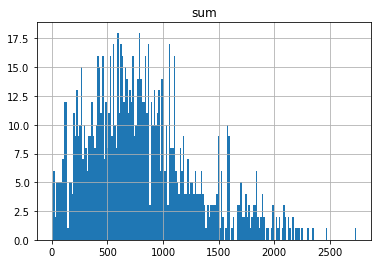

In [194]:
ist = res2.iloc[:-1].hist(bins=200, column='sum')

In [195]:
top=res2.iloc[-1,:-1].to_frame().sort_values(by=['Total'],ascending=False)
top

,Total
TSHZ2,0.897996
KLHL29,0.885246
HPSE2,0.821494
FLAD1,0.798725
EGFR,0.795082
...,...
HADHAP2,0.002732
ARHGEF5,0.002732
FCGR1A,0.001821
OXTR,0.000000


In [196]:
complexes[complexes.SYMBOL_TG =='WLS']

,tf_complex,SYMBOL_TG
4603,"[AR, FOXP3]",WLS


In [197]:
top_10=list(top.head(100).index)

In [198]:
top_10

['TSHZ2',
 'KLHL29',
 'HPSE2',
 'FLAD1',
 'EGFR',
 'WLS',
 'DMD',
 'PABPC1P4',
 'NFIB',
 'RUNX3',
 'CNTNAP3',
 'SCPEP1',
 'ISM1',
 'CCL14',
 'ANKRD29',
 'PTCH2',
 'LAMA3',
 'CCNB1',
 'CDCA8',
 'DAP3',
 'MET',
 'COL11A1',
 'SLAIN1',
 'FAM126A',
 'MAML2',
 'ADIPOR1',
 'NR3C2',
 'ADAM33',
 'LIFR',
 'AMOTL1',
 'SPAG5',
 'FAM117A',
 'AURKA',
 'SMARCA2',
 'GNAL',
 'NAALADL1',
 'RNASEH2A',
 'RNF145',
 'CRB2',
 'PTCH1',
 'FOXM1',
 'AK5',
 'KLHL21',
 'SCRG1',
 'NPAS3',
 'PRC1',
 'VAMP2',
 'PGM5',
 'TRIM2',
 'SV2A',
 'AGTR1',
 'ZFP36L2',
 'MAP2',
 'TP63',
 'THRB',
 'SPRY1',
 'EFNB3',
 'LRIG3',
 'GLB1L3',
 'TM4SF18',
 'PM20D2',
 'ME3',
 'LAYN',
 'ASTN1',
 'LIMS2',
 'UBE2T',
 'APBA1',
 'BDH2',
 'PCDHGB7',
 'CHST3',
 'DDR1',
 'GCNT4',
 'ETV5',
 'INPP1',
 'CYP39A1',
 'LRP4',
 'MYBL2',
 'PTPN21',
 'PCDHGB4',
 'KLHL2',
 'OSBPL1A',
 'CEP112',
 'RASIP1',
 'RFC2',
 'RBMS3',
 'TRIP13',
 'KPNA2',
 'SCN3A',
 'PCNA',
 'MID1',
 'MEOX1',
 'PRKD1',
 'PLK1',
 'SATB1',
 'HOXA10',
 'GABRP',
 'NME1',
 'IL4R',
 'SHF

In [199]:
import gseapy as gp
gseapy_library = gp.get_library_name(organism='Human')
gseapy_library

['ARCHS4_Cell-lines',
 'ARCHS4_IDG_Coexp',
 'ARCHS4_Kinases_Coexp',
 'ARCHS4_TFs_Coexp',
 'ARCHS4_Tissues',
 'Achilles_fitness_decrease',
 'Achilles_fitness_increase',
 'Aging_Perturbations_from_GEO_down',
 'Aging_Perturbations_from_GEO_up',
 'Allen_Brain_Atlas_10x_scRNA_2021',
 'Allen_Brain_Atlas_down',
 'Allen_Brain_Atlas_up',
 'Azimuth_Cell_Types_2021',
 'BioCarta_2013',
 'BioCarta_2015',
 'BioCarta_2016',
 'BioPlanet_2019',
 'BioPlex_2017',
 'CCLE_Proteomics_2020',
 'CORUM',
 'COVID-19_Related_Gene_Sets',
 'COVID-19_Related_Gene_Sets_2021',
 'Cancer_Cell_Line_Encyclopedia',
 'CellMarker_Augmented_2021',
 'ChEA_2013',
 'ChEA_2015',
 'ChEA_2016',
 'Chromosome_Location',
 'Chromosome_Location_hg19',
 'ClinVar_2019',
 'DSigDB',
 'Data_Acquisition_Method_Most_Popular_Genes',
 'DepMap_WG_CRISPR_Screens_Broad_CellLines_2019',
 'DepMap_WG_CRISPR_Screens_Sanger_CellLines_2019',
 'Descartes_Cell_Types_and_Tissue_2021',
 'DisGeNET',
 'Disease_Perturbations_from_GEO_down',
 'Disease_Perturbati

In [200]:
enr=gp.enrichr(gene_list=top_10 ,organism='Human',gene_sets=['KEGG_2021_Human'])
enr.results.sort_values('Adjusted P-value').head(15)

2022-01-26 14:06:36,154 Warning: No enrich terms using library KEGG_2021_Human when cutoff = 0.05


,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,KEGG_2021_Human,DNA replication,3/36,0.000768,0.103704,0,0,18.619494,133.529521,PCNA;RNASEH2A;RFC2
22,KEGG_2021_Human,Hepatocellular carcinoma,3/168,0.052155,0.306126,0,0,3.699157,10.925598,SMARCA2;MET;EGFR
21,KEGG_2021_Human,Non-small cell lung cancer,2/72,0.050464,0.306126,0,0,5.781341,17.265972,MET;EGFR
20,KEGG_2021_Human,Melanoma,2/72,0.050464,0.306126,0,0,5.781341,17.265972,MET;EGFR
19,KEGG_2021_Human,Adherens junction,2/71,0.049219,0.306126,0,0,5.865424,17.663636,MET;EGFR
17,KEGG_2021_Human,Epithelial cell signaling in Helicobacter pylo...,2/70,0.047985,0.306126,0,0,5.951981,18.075399,MET;EGFR
16,KEGG_2021_Human,Central carbon metabolism in cancer,2/70,0.047985,0.306126,0,0,5.951981,18.075399,MET;EGFR
15,KEGG_2021_Human,JAK-STAT signaling pathway,3/162,0.047728,0.306126,0,0,3.839914,11.681905,IL4R;LIFR;EGFR
14,KEGG_2021_Human,Basal cell carcinoma,2/63,0.039682,0.306126,0,0,6.637337,21.417757,PTCH1;PTCH2
13,KEGG_2021_Human,Riboflavin metabolism,1/8,0.039314,0.306126,0,0,28.705628,92.896785,FLAD1


In [201]:
res2

,BRCA2,CYP1B1,ABCF1,ABCA4,ABL1,ABL2,ABR,ACADM,ACAT2,ACVR1,...,CBWD6,DND1P1,GOLGA6L10,TLCD2,FABP5P7,RCN1P2,PDZK1P1,FLJ37453,POM121C,sum
patient id,,,,,,,,,,,,,,,,,,,,,
TCGA-3C-AAAU-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,705.000000
TCGA-3C-AALI-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1134.000000
TCGA-3C-AALJ-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,847.000000
TCGA-3C-AALK-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,555.000000
TCGA-4H-AAAK-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,233.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-XX-A899-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,116.000000
TCGA-XX-A89A-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,298.000000
TCGA-Z7-A8R5-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,411.000000


In [202]:
mut = pd.read_csv("../../zaka/mutation analysis//somatic mutations Unified.csv", index_col = 0)

/nfs/home/users/zaka/.conda/envs/z/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/nfs/home/users/zaka/.conda/envs/z/lib/python3.9/site-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [203]:
mut.head()

,sample,chr,start,end,reference,alt,gene,effect,Amino_Acid_Change,DNA_VAF,SIFT,PolyPhen,Gene name,lenght,symbol,coding lenght
0,TCGA-02-0003-01,10,123810032,123810032,C,T,TACC2,Missense_Mutation,p.T38M,0.88,NaN,benign(0.335),TACC2,265382,TACC2,9704
1,TCGA-05-4427-01,10,123846949,123846949,A,T,TACC2,Missense_Mutation,p.E1645V,0.49,NaN,possibly_damaging(0.489),TACC2,265382,TACC2,9704
2,TCGA-06-5416-01,10,123781458,123781458,C,T,TACC2,5'UTR,NaN,0.20,NaN,NaN,TACC2,265382,TACC2,9704
3,TCGA-06-5416-01,10,123843451,123843451,G,A,TACC2,Missense_Mutation,p.G479E,0.45,NaN,benign(0.02),TACC2,265382,TACC2,9704
4,TCGA-06-5416-01,10,123843517,123843517,T,C,TACC2,Missense_Mutation,p.L501S,0.24,NaN,benign(0),TACC2,265382,TACC2,9704


In [204]:
lengths = {tup[7]: tup[14] for tup in mut.itertuples()}


In [205]:
mut = mut[mut.effect == "Missense_Mutation"]
mut_pt = list(set(mut["sample"]))
genes = list(set(mut.gene))
genes_idx = {genes[i]:i for i in range(len(genes))}
pat_idx = {mut_pt[i]: i for i in range(len(mut_pt))}
mut_mat = np.zeros((len(mut_pt), len(genes)))
for tup in mut.itertuples():
    mut_mat[pat_idx[tup[1]],genes_idx[tup[7]]]+=1 
mut_pt = [x for x in mut_pt]
mut = pd.DataFrame(mut_mat, index = mut_pt, columns = genes)
mut.head()

,SPEF2,AQP3,FUT9,RPL6,NAP1L3,TRBJ2-5,SLC2A11,MFAP3,ARHGAP31,TBC1D13,...,KCTD14,CELSR3,KRTAP1-3,COL5A2,POU2AF1,TRABD2A,PIP4K2C,PARP1,TSPY2,SERP1
TCGA-L6-A4EU-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TCGA-BQ-5884-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TCGA-HT-7606-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TCGA-E6-A2P9-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
TCGA-06-0876-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [206]:
res2

,BRCA2,CYP1B1,ABCF1,ABCA4,ABL1,ABL2,ABR,ACADM,ACAT2,ACVR1,...,CBWD6,DND1P1,GOLGA6L10,TLCD2,FABP5P7,RCN1P2,PDZK1P1,FLJ37453,POM121C,sum
patient id,,,,,,,,,,,,,,,,,,,,,
TCGA-3C-AAAU-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,705.000000
TCGA-3C-AALI-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1134.000000
TCGA-3C-AALJ-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,847.000000
TCGA-3C-AALK-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,555.000000
TCGA-4H-AAAK-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,233.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-XX-A899-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,116.000000
TCGA-XX-A89A-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,298.000000
TCGA-Z7-A8R5-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,411.000000


In [207]:
mut_local = mut.copy()
patients_mut = list(set(mut.index).intersection(set(res2.index)))
mut_local = mut_local.loc[patients_mut]
res3=res2.copy().loc[patients_mut]

In [301]:
met = pd.read_csv("../../PANCAN/methylation.csv", index_col = 0)
met = met.T

In [308]:
patients_met = list(set(met.index).intersection(set(res2.index)))
met_local = met.copy()
met_local = met.loc[patients_met]
res3=res2.copy().loc[patients_met]

In [309]:
res3

,BRCA2,CYP1B1,ABCF1,ABCA4,ABL1,ABL2,ABR,ACADM,ACAT2,ACVR1,...,CBWD6,DND1P1,GOLGA6L10,TLCD2,FABP5P7,RCN1P2,PDZK1P1,FLJ37453,POM121C,sum
patient id,,,,,,,,,,,,,,,,,,,,,
TCGA-E9-A5UP-01,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,860.0
TCGA-E2-A56Z-01,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,912.0
TCGA-AN-A0XO-01,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,533.0
TCGA-A2-A0SY-01,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,533.0
TCGA-E2-A570-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,457.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-C8-A1HK-01,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,811.0
TCGA-C8-A275-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,630.0
TCGA-A2-A1G6-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [310]:
met_local

,FUCA2,BRI3,ZBED5,CKAP2,KIAA1704,NUFIP1,SEC14L1,STK39,MAPK1IP1L,BOLA1,...,SLC27A4,SLC39A10,JMY,RP1L1,PDPR,PPM1L,FAM65A,ZFP30,DLGAP4,RGS1
TCGA-E9-A5UP-01,0.264883,0.212083,0.038873,0.038374,0.085749,0.085749,0.022077,0.065728,0.040580,0.152115,...,0.035171,0.731485,0.076255,0.105513,0.028502,0.115785,0.049887,0.026280,0.057005,0.700158
TCGA-E2-A56Z-01,0.236494,0.126221,0.029478,0.028578,0.061609,0.061609,0.021203,0.060769,0.033143,0.073927,...,0.027772,0.667548,0.068634,0.307144,0.019105,0.077977,0.093277,0.014075,0.051451,0.615459
TCGA-AN-A0XO-01,0.265180,0.114145,0.053205,0.031018,0.099933,0.099933,0.023468,0.058533,0.034894,0.143636,...,0.060246,0.713603,0.062153,0.247102,0.016611,0.079140,0.089494,0.016101,0.099703,0.758331
TCGA-A2-A0SY-01,0.300178,0.183074,0.038618,0.028115,0.083165,0.083165,0.020696,0.039393,0.033607,0.083650,...,0.050307,0.598971,0.053662,0.521128,0.024240,0.059014,0.107828,0.020543,0.132877,0.836042
TCGA-E2-A570-01,0.239329,0.181240,0.030099,0.029921,0.075369,0.075369,0.022577,0.057516,0.029980,0.165659,...,0.027730,0.783928,0.060002,0.302445,0.025734,0.073026,0.072607,0.017036,0.048414,0.874163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-C8-A1HK-01,0.230259,0.135645,0.048763,0.033579,0.125849,0.125849,0.016815,0.050873,0.028555,0.068079,...,0.031269,0.760337,0.056133,0.604625,0.019519,0.024876,0.130473,0.016159,0.025636,0.652727
TCGA-C8-A275-01,0.247599,0.162133,0.039931,0.035781,0.130851,0.130851,0.023593,0.064101,0.032201,0.094782,...,0.036189,0.899456,0.065765,0.382716,0.024847,0.068260,0.527570,0.020337,0.035094,0.758347
TCGA-A2-A1G6-01,0.246455,0.118851,0.047666,0.029462,0.085966,0.085966,0.018127,0.063995,0.034247,0.080526,...,0.038224,0.798372,0.047964,0.257311,0.022293,0.071985,0.070216,0.018231,0.055293,0.839124
TCGA-BH-A1FR-01,0.294076,0.129409,0.057323,0.029833,0.072820,0.072820,0.020707,0.070073,0.029228,0.086116,...,0.030852,0.867510,0.051767,0.449999,0.021050,0.072656,0.077787,0.019332,0.049224,0.852183


In [377]:
pvalues=[]
for target in met_local.columns:
    

    if target in res3.columns:

        met=res3[target]

        dyreg_patients=list(met[met==1].index)
        not_dyreg_patients= [ x for x in patients_met if x not in dyreg_patients ]

        if len(dyreg_patients)>5:

            # methaltion values for dysr targets
            met_for_dys=met_local.loc[dyreg_patients][target].values


            # methaltion values for not dysr targets
            met_for_not_dys=met_local.loc[not_dyreg_patients][target].values


            _,p=stats.mannwhitneyu(met_for_dys,met_for_not_dys, alternative = "greater")

            pvalues.append(p)


In [378]:
pvalues

[0.9745641501628639,
 0.8238169343413195,
 0.05471389964061398,
 0.5813519063017245,
 0.020168269128507874,
 0.11541452971629501,
 0.9853770421423435,
 0.13024214229379663,
 0.017021496693419902,
 0.10725066107477194,
 0.8539312566342472,
 0.7123996656861209,
 0.7626347592575858,
 2.2054679635636722e-07,
 0.08378398378858437,
 0.0021883639038742506,
 0.16872638439743487,
 0.6713109519000017,
 0.9979431462239351,
 1.2246895470227845e-19,
 0.4120559677774451,
 0.9999999358294921,
 0.12126694564197804,
 0.0008345834997888922,
 0.7445646278659539,
 0.7612622842835157,
 0.5501573448012579,
 0.9162110122350363,
 0.9999963562272043,
 0.08335632511357266,
 0.2518111879502837,
 0.00019227444407227768,
 0.9989929499724509,
 0.064397399283509,
 0.24323327278198736,
 0.6442085232313874,
 0.30431446284913033,
 0.22773684759238838,
 0.9996467794116976,
 0.40065029903768906,
 0.02638009013560339,
 0.9999159845997492,
 0.973078100528563,
 0.9463892637765774,
 0.3470191013801496,
 0.0021554890427965528

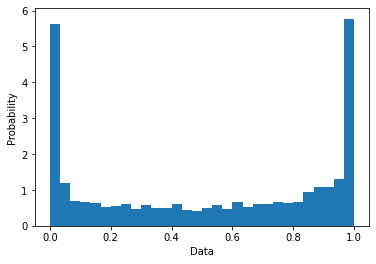

In [380]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


plt.hist(np.array(pvalues), density=True, bins=30)  # density=False would make counts
plt.ylabel('Probability')
plt.xlabel('Data');

In [381]:
    _,pvs,_,_ = mt.multipletests(pvalues, method = "fdr_bh")


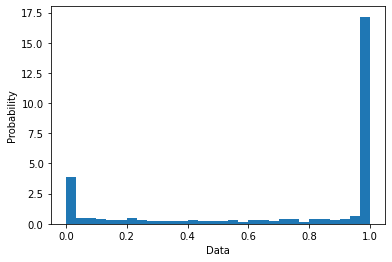

In [383]:
plt.hist(np.array(pvs), density=True, bins=30)  # density=False would make counts
plt.ylabel('Probability')
plt.xlabel('Data');

In [396]:
len(pvs[pvs<0.05])/len(pvs)

0.13680026498840675

In [232]:
complexes

(array(['PARP1', 'E2F4', 'MYC', 'NFKB1', 'RELA'], dtype=object), 'BRCA2')

In [247]:
mut_local[edge[0]].sum(axis=1)

TCGA-E2-A56Z-01    0.0
TCGA-AN-A0XO-01    0.0
TCGA-A2-A0SY-01    0.0
TCGA-BH-A0BG-01    0.0
TCGA-E2-A570-01    0.0
                  ... 
TCGA-C8-A1HK-01    0.0
TCGA-C8-A275-01    0.0
TCGA-A2-A1G6-01    0.0
TCGA-BH-A1FR-01    0.0
TCGA-C8-A26Y-01    1.0
Length: 733, dtype: float64

In [292]:
pvalues=[]
for tup in tqdm(complexes[:2].itertuples()):

        edge = (tup[1],tup[2])
        y=mut_local[edge[0]].sum(axis=1).values
        y[y>1]=1
        
        if y.sum()> 7 and ( edge[1] in res3.columns) :
            # at least n mutations for the test

            # get dysregulation of target
            x=res3[edge[1]].values
            x = sm.add_constant(x)


            # test with logit regression

            logit_res = sm.Logit(y,x)
            logit_res = logit_mod.fit(method='bfgs')
            p=logit_res.pvalues[0]
            
            pvalues.append(p)

2it [00:00, 95.04it/s]

Optimization terminated successfully.
         Current function value: 0.077258
         Iterations: 32
         Function evaluations: 33
         Gradient evaluations: 33
Optimization terminated successfully.
         Current function value: 0.077258
         Iterations: 32
         Function evaluations: 33
         Gradient evaluations: 33


In [293]:
edge

(array(['AHR', 'ARNT', 'BRCA1', 'SP1'], dtype=object), 'CYP1B1')

In [294]:
y.shape

(733,)

In [295]:
x.shape

(733, 2)

In [296]:
print(logit_res.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  733
Model:                          Logit   Df Residuals:                      731
Method:                           MLE   Df Model:                            1
Date:                Wed, 26 Jan 2022   Pseudo R-squ.:                0.008387
Time:                        14:28:29   Log-Likelihood:                -56.630
converged:                       True   LL-Null:                       -57.109
Covariance Type:            nonrobust   LLR p-value:                    0.3277
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -8.9027    122.052     -0.073      0.942    -248.120     230.314
const         -4.1402      0.304    -13.624      0.000      -4.736      -3.545


In [299]:
x[:,1]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 1., 0.

In [251]:
logit_res.pvalues[0]

0.9993320546236472

In [227]:
res3[edge[1]]

patient id
TCGA-E2-A56Z-01    0.0
TCGA-AN-A0XO-01    0.0
TCGA-A2-A0SY-01    0.0
TCGA-BH-A0BG-01    0.0
TCGA-E2-A570-01    0.0
                  ... 
TCGA-C8-A1HK-01    0.0
TCGA-C8-A275-01    0.0
TCGA-A2-A1G6-01    0.0
TCGA-BH-A1FR-01    0.0
TCGA-C8-A26Y-01    0.0
Name: BRCA2, Length: 733, dtype: float64

In [100]:
complexes

,tf_complex,SYMBOL_TG
0,"[PARP1, E2F4, MYC, NFKB1, RELA]",BRCA2
7,"[AHR, ARNT, BRCA1, SP1]",CYP1B1
10,"[AHR, AR, HIF1A]",SOS1
15,"[AR, FOXP3]",ABCF1
16,[AR],ABCA4
...,...,...
18538,[FOXP3],RCN1P2
18541,[FOXP3],PDZK1P1
18554,[FOXP3],CCR2
18572,[FOXP3],FLJ37453


In [156]:
def mutation_nalysis(mut_data,dys_data):
    
    for tup in tqdm(complexes.itertuples()):
                
            edge = (tup[1],tup[2])
            mut_tmp=mut_local[edge[0]].sum(axis=1)    

In [163]:
m=mut_local[edge[0]].sum(axis=1)

In [165]:
m

TCGA-E2-A56Z-01    0.0
TCGA-AN-A0XO-01    0.0
TCGA-A2-A0SY-01    0.0
TCGA-BH-A0BG-01    0.0
TCGA-E2-A570-01    0.0
                  ... 
TCGA-C8-A1HK-01    0.0
TCGA-C8-A275-01    0.0
TCGA-A2-A1G6-01    0.0
TCGA-BH-A1FR-01    0.0
TCGA-C8-A26Y-01    1.0
Length: 733, dtype: float64

In [140]:
mut_local[edge[2]]    

IndexError: tuple index out of range

In [95]:
mut_local

,SPEF2,AQP3,FUT9,RPL6,NAP1L3,TRBJ2-5,SLC2A11,MFAP3,ARHGAP31,TBC1D13,...,KCTD14,CELSR3,KRTAP1-3,COL5A2,POU2AF1,TRABD2A,PIP4K2C,PARP1,TSPY2,SERP1
TCGA-E2-A56Z-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TCGA-AN-A0XO-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TCGA-A2-A0SY-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TCGA-BH-A0BG-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TCGA-E2-A570-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-C8-A1HK-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TCGA-C8-A275-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TCGA-A2-A1G6-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TCGA-BH-A1FR-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
